# TP1 : Classification de voyelles par lois gaussiennes
MAACHOU - KHALIL :

Déposer le notebook sur Moodle à la fin de la séance

### Vérification des données


In [ ]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#1- Charger les données d'apprentissage avec le code suivant :
f = open('APP.pkl', 'rb')
dicoAPP = pickle.load(f)
app_aa = dicoAPP["aa"]
app_ii = dicoAPP["ii"]
app_uu = dicoAPP["uu"]
f.close()

# Vérifier le contenu et la taille des matrices
print("app_aa: ",app_aa.shape)
print("app_ii: ",app_ii.shape)
print("app_uu: ",app_uu.shape)
# Il s'agit de matrices 80x2 résultant d'une ACP sur une paramétrisation cepstrale (cf. cours M1 !).

app_aa:  (80, 2)
app_ii:  (80, 2)
app_uu:  (80, 2)


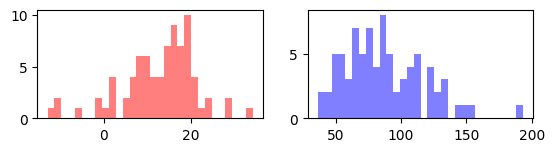

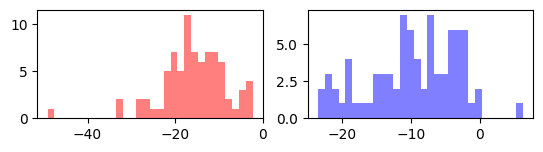

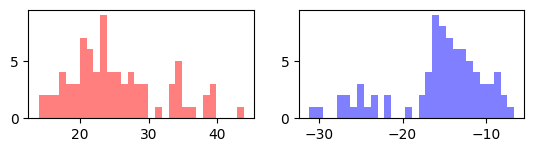

In [ ]:
# 2- Afficher sur une seule figure, en utilisant subplot(nb_lignes, nb_colonnes, numero_trace),
# l'histogramme de chacune des classes : aa, uu et ii.


# Histogramme pour app_aa
plt.subplot(3, 2, 1)
plt.hist(app_aa[:, 0], bins=30, alpha=0.5, color='r', label='Dimension 1')
plt.subplot(3, 2, 2)
plt.hist(app_aa[:, 1], bins=30, alpha=0.5, color='b', label='Dimension 2')
plt.show()


# Histogramme pour app_ii
plt.subplot(3, 2, 3)
plt.hist(app_ii[:, 0], bins=30, alpha=0.5, color='r', label='Dimension 1')
plt.subplot(3, 2, 4)
plt.hist(app_ii[:, 1], bins=30, alpha=0.5, color='b', label='Dimension 2')
plt.show()


# Histogramme pour app_uu
plt.subplot(3, 2, 5)
plt.hist(app_uu[:, 0], bins=30, alpha=0.5, color='r', label='Dimension 1')
plt.subplot(3, 2, 6)
plt.hist(app_uu[:, 1], bins=30, alpha=0.5, color='b', label='Dimension 2')
plt.show()





# Que pouvez-vous conclure ? Ecrire quelques lignes pour exppiquer
# ...
# ...


### Utilisation de lois gaussiennes

In [ ]:
#3- APPRENTISSAGE : estimer les paramètres (moyenne et matrice de covariance) de chaque classe
import numpy as np
m_aa = np.mean(app_aa, axis=0)
c_aa = np.cov(app_aa, rowvar=False)

m_ii = np.mean(app_ii, axis=0)
c_ii = np.cov(app_ii, rowvar=False)

m_uu = np.mean(app_uu, axis=0)
c_uu = np.cov(app_uu, rowvar=False)

# Quelles sont les dimensions des variables crées ; que contiennent-elles ?


In [ ]:
f = open('EVAL.pkl', 'rb')
dicoTST = pickle.load(f)
tst_aa = dicoTST["aa"]
tst_ii = dicoTST["ii"]
tst_uu = dicoTST["uu"]
f.close()

In [ ]:
#4- RECONNAISSANCE : écrire une fonction "classer" qui renvoie la classe obtenue
def classer(observation, moyenne_aa, covariance_aa, moyenne_uu, covariance_uu, moyenne_ii, covariance_ii, text_classe=False):
    # Calculer les densités de probabilité gaussienne pour chaque classe
    prob_aa = np.log(np.linalg.det(covariance_aa)) + np.dot(np.dot((observation - moyenne_aa), np.linalg.inv(covariance_aa)), np.matrix.transpose((observation - moyenne_aa)))
    prob_ii = np.log(np.linalg.det(covariance_ii)) + np.dot(np.dot((observation - moyenne_ii), np.linalg.inv(covariance_ii)), np.matrix.transpose((observation - moyenne_ii)))
    prob_uu = np.log(np.linalg.det(covariance_uu)) + np.dot(np.dot((observation - moyenne_uu), np.linalg.inv(covariance_uu)), np.matrix.transpose((observation - moyenne_uu)))

    classe_predite = np.argmin([prob_aa, prob_ii, prob_uu])

    # Retourner la classe prédite ('aa', 'ii' ou 'uu')
    if text_classe:
      if classe_predite == 0:
          return 'aa'
      elif classe_predite == 1:
          return 'ii'
      else:
          return 'uu'
    else:
      return classe_predite

# par maximum de vraisemblance sur les lois gaussiennes estimées (modèle de chaque classe)

# sur l'observation fournie en entrée :

# Exemple de résultat :
classe = classer(tst_aa[0,:], m_aa, c_aa, m_uu, c_uu, m_ii, c_ii)
classe
# => no_classe = 1

0

In [ ]:
#6- Définir la fonction tout_tester qui effectue tous les tests de classification
from sklearn.metrics import confusion_matrix

def tout_tester(tst_aa, tst_ii, tst_uu, m_aa, c_aa, m_uu, c_uu, m_ii, c_ii):
  y_pred = []
  y_true = [0] * tst_aa.shape[0] + [1] * tst_uu.shape[0] + [2] * tst_ii.shape[0]

  result_local = []
  for inpt in tst_aa:
    result_local.append(classer(inpt, m_aa, c_aa, m_uu, c_uu, m_ii, c_ii))
  y_pred.extend(result_local)

  result_local = []
  for inpt in tst_ii:
    result_local.append(classer(inpt, m_aa, c_aa, m_uu, c_uu, m_ii, c_ii))
  y_pred.extend(result_local)

  result_local = []
  for inpt in tst_uu:
    result_local.append(classer(inpt, m_aa, c_aa, m_uu, c_uu, m_ii, c_ii))
  y_pred.extend(result_local)

  matrice_confusion = confusion_matrix(y_true, y_pred)
  taux_reco = np.sum(np.diag(matrice_confusion)) / np.sum(matrice_confusion)

  return matrice_confusion, taux_reco



In [ ]:
#7- Réaliser les tests et afficher la matrice de confusion et le taux de bonne reconnaisance correspondant
matrice_confusion, taux_reco = tout_tester(tst_aa, tst_ii, tst_uu, m_aa, c_aa, m_uu, c_uu, m_ii, c_ii)
print("matrice_confusion= ")
print(matrice_confusion)
print("taux_reco= ",taux_reco)

matrice_confusion= 
[[92  1  2]
 [ 0 98  0]
 [ 0 42 48]]
taux_reco=  0.8409893992932862


### Visualisation  des résultats

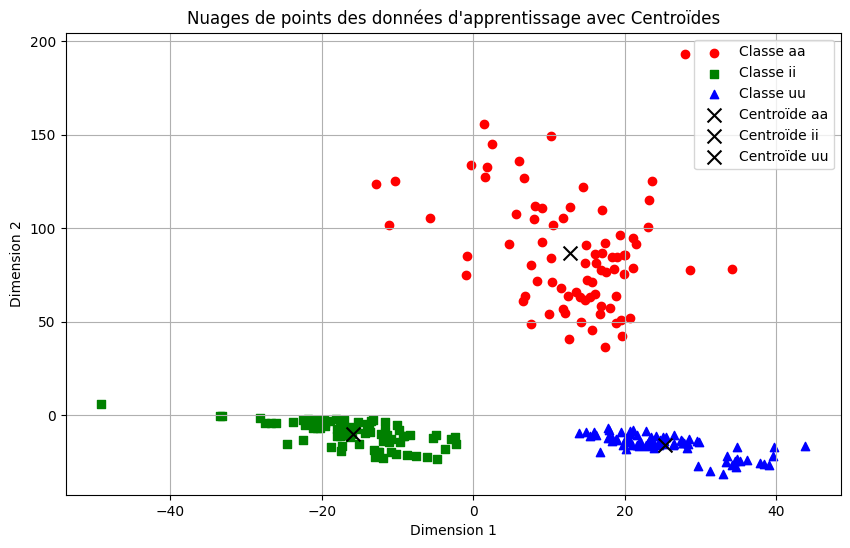

In [ ]:
#9- Représenter en 2D et par des couleurs différentes les nuages de points correspondant
# aux données d'apprentissage

#10- Afficher les centroïdes des différentes classes

import matplotlib.pyplot as plt
app_uu = dicoAPP["uu"]

# Calculer les centroïdes de chaque classe
centroid_aa = app_aa.mean(axis=0)
centroid_ii = app_ii.mean(axis=0)
centroid_uu = app_uu.mean(axis=0)

plt.figure(figsize=(10, 6))

plt.scatter(app_aa[:, 0], app_aa[:, 1], label='Classe aa', color='r', marker='o')
plt.scatter(app_ii[:, 0], app_ii[:, 1], label='Classe ii', color='g', marker='s')
plt.scatter(app_uu[:, 0], app_uu[:, 1], label='Classe uu', color='b', marker='^')

plt.scatter(centroid_aa[0], centroid_aa[1], color='k', marker='x', s=100, label='Centroïde aa')
plt.scatter(centroid_ii[0], centroid_ii[1], color='k', marker='x', s=100, label='Centroïde ii')
plt.scatter(centroid_uu[0], centroid_uu[1], color='k', marker='x', s=100, label='Centroïde uu')

plt.legend()
plt.title('Nuages de points des données d\'apprentissage avec Centroïdes')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

plt.grid(True)
plt.show()
